In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

<h2> Hotel Reviews </h2>

In [29]:
hotel_reviews=pd.read_csv('hotels/hotel_reviews.csv')
hotel_reviews.head(3)

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN


In [30]:
hotel_reviews=hotel_reviews[['reviews.text','reviews.rating']]
hotel_reviews

,reviews.text,reviews.rating
0,Pleasant 10 min walk along the sea front to th...,4.0
1,Really lovely hotel. Stayed on the very top fl...,5.0
2,Ett mycket bra hotell. Det som drog ner betyge...,5.0
3,We stayed here for four nights in October. The...,5.0
4,We stayed here for four nights in October. The...,5.0
...,...,...
35907,Best of the Best!!!! My family and I stayed in...,5.0
35908,Amazing Vacation in Beautiful Cabin We stayed ...,5.0
35909,My husband and I stayed at Tree Tops which is ...,5.0
35910,to share your opinion of this businesswith YP ...,0.0


In [31]:
hotel_reviews.dropna(inplace=True)
hotel_reviews

,reviews.text,reviews.rating
0,Pleasant 10 min walk along the sea front to th...,4.0
1,Really lovely hotel. Stayed on the very top fl...,5.0
2,Ett mycket bra hotell. Det som drog ner betyge...,5.0
3,We stayed here for four nights in October. The...,5.0
4,We stayed here for four nights in October. The...,5.0
...,...,...
35907,Best of the Best!!!! My family and I stayed in...,5.0
35908,Amazing Vacation in Beautiful Cabin We stayed ...,5.0
35909,My husband and I stayed at Tree Tops which is ...,5.0
35910,to share your opinion of this businesswith YP ...,0.0


In [32]:
hotel_reviews = hotel_reviews[(hotel_reviews['reviews.rating']>0) & (hotel_reviews['reviews.rating']<=5)]
hotel_reviews

,reviews.text,reviews.rating
0,Pleasant 10 min walk along the sea front to th...,4.0
1,Really lovely hotel. Stayed on the very top fl...,5.0
2,Ett mycket bra hotell. Det som drog ner betyge...,5.0
3,We stayed here for four nights in October. The...,5.0
4,We stayed here for four nights in October. The...,5.0
...,...,...
35905,We truly enjoyed staying at the Elk Springs re...,5.0
35906,We were here for a 2nd time the last weekend o...,5.0
35907,Best of the Best!!!! My family and I stayed in...,5.0
35908,Amazing Vacation in Beautiful Cabin We stayed ...,5.0


In [33]:
avg_mask=hotel_reviews['reviews.rating']==3
pos_mask=hotel_reviews['reviews.rating']>3
neg_mask=hotel_reviews['reviews.rating']<3

In [34]:
pos_mask

0        True
1        True
2        True
3        True
4        True
         ... 
35905    True
35906    True
35907    True
35908    True
35909    True
Name: reviews.rating, Length: 34334, dtype: bool

In [35]:
hotel_reviews.loc[ avg_mask, 'reviews.rating'] ='avg'
hotel_reviews.loc[ pos_mask, 'reviews.rating'] ='pos'
hotel_reviews.loc[ neg_mask, 'reviews.rating'] ='neg'

In [36]:
hotel_reviews

,reviews.text,reviews.rating
0,Pleasant 10 min walk along the sea front to th...,pos
1,Really lovely hotel. Stayed on the very top fl...,pos
2,Ett mycket bra hotell. Det som drog ner betyge...,pos
3,We stayed here for four nights in October. The...,pos
4,We stayed here for four nights in October. The...,pos
...,...,...
35905,We truly enjoyed staying at the Elk Springs re...,pos
35906,We were here for a 2nd time the last weekend o...,pos
35907,Best of the Best!!!! My family and I stayed in...,pos
35908,Amazing Vacation in Beautiful Cabin We stayed ...,pos


In [37]:
train_data, test_data = train_test_split(hotel_reviews, test_size=0.3)

In [38]:
train_text=train_data['reviews.text']
test_text=test_data['reviews.text']
train_labels=train_data['reviews.rating']
test_labels=test_data['reviews.rating']

In [39]:

#Build a counter based on the training dataset
counter = CountVectorizer()
counter.fit(train_text)


#count the number of times each term appears in a document and transform each doc into a count vector
counts_train = counter.transform(train_text)#transform the training data
counts_test = counter.transform(test_text)#transform the testing data

vocabulary=[x[0] for x in sorted(counter.vocabulary_.items(),key=lambda x:x[1])]


In [40]:
counter.vocabulary_.items()

dict_items([('couldn', 5967), ('sleep', 21736), ('because', 2872), ('of', 16452), ('ac', 837), ('unit', 24925), ('banging', 2642), ('all', 1374), ('night', 16055), ('breakfast', 3643), ('for', 9702), ('disappointing', 7176), ('to', 24019), ('say', 20698), ('the', 23728), ('lease', 13729), ('trays', 24389), ('were', 26202), ('empty', 8210), ('nobody', 16102), ('around', 2017), ('refill', 19381), ('foods', 9681), ('and', 1613), ('top', 24125), ('it', 12752), ('off', 16455), ('get', 10439), ('room', 20285), ('reserved', 19800), ('they', 23775), ('said', 20510), ('someone', 22056), ('had', 11034), ('been', 2915), ('smoking', 21865), ('in', 12200), ('so', 21941), ('use', 25171), ('got', 10661), ('different', 7051), ('wont', 26487), ('be', 2822), ('staying', 22598), ('there', 23760), ('anymore', 1791), ('stayed', 22594), ('this', 23801), ('hotel', 11756), ('while', 26276), ('visiting', 25716), ('my', 15698), ('son', 22076), ('at', 2195), ('west', 26217), ('point', 17981), ('was', 26006), ('v

In [41]:
vocabulary

['00',
 '000',
 '0000',
 '0002',
 '00am',
 '00dcopxqg',
 '00dollar',
 '00n',
 '00p',
 '00pm',
 '01',
 '02',
 '0200',
 '03',
 '0300am',
 '0330',
 '03am',
 '03mbps',
 '04',
 '0400',
 '05',
 '054',
 '0555',
 '05h30',
 '06',
 '0600',
 '07',
 '08',
 '0815',
 '0830',
 '09',
 '0930',
 '0ne',
 '10',
 '100',
 '1000',
 '10000rp',
 '1000am',
 '1008',
 '100m',
 '100mb',
 '100not',
 '100x',
 '101',
 '1013',
 '1015',
 '102',
 '1020',
 '103',
 '1030',
 '1030am',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '10a',
 '10am',
 '10dollars',
 '10euros',
 '10gg',
 '10ish',
 '10miles',
 '10min',
 '10minutes',
 '10mn',
 '10p',
 '10pm',
 '10th',
 '10x',
 '10yerars',
 '11',
 '110',
 '111',
 '112',
 '113',
 '1130am',
 '1130pm',
 '114was',
 '115',
 '116',
 '1161',
 '117',
 '118',
 '119',
 '11am',
 '11amwe',
 '11hour',
 '11ieme',
 '11ish',
 '11p',
 '11pm',
 '11th',
 '11v',
 '11y',
 '11yo',
 '12',
 '120',
 '1200',
 '1200pm',
 '121',
 '122',
 '123',
 '1230',
 '1230am',
 '124',
 '125',
 '126',
 '127',
 '1278',
 '

In [47]:
model=DecisionTreeClassifier(max_depth=6,min_samples_split=10)
         
model.fit(counts_train, train_labels)

pred=model.predict(counts_test)

accuracy_score(test_labels,pred)

0.6943986020774682

In [42]:
model.classes_

array(['avg', 'neg', 'pos'], dtype=object)

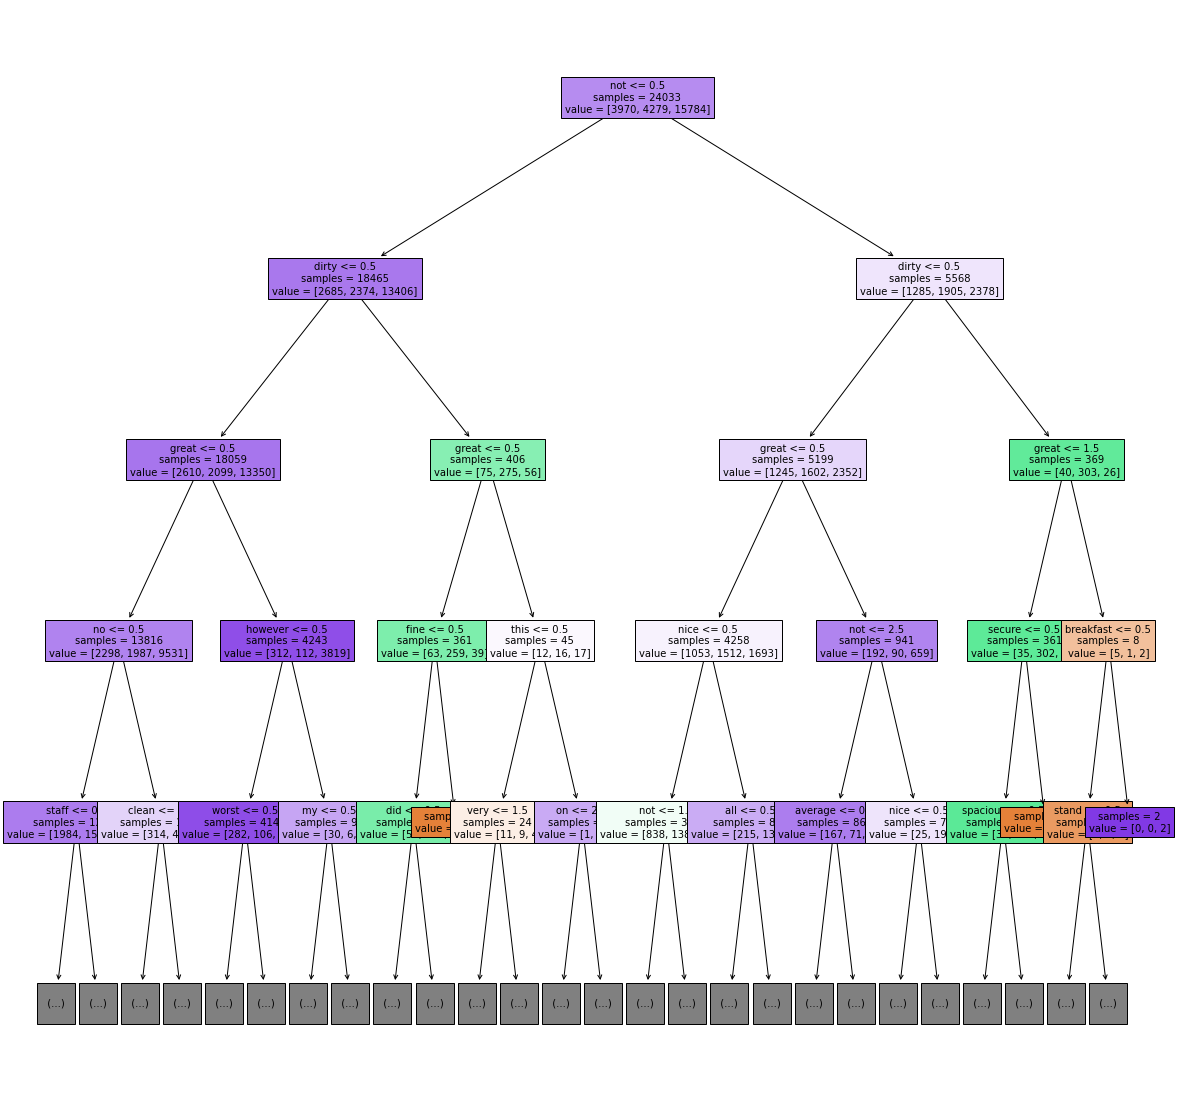

In [19]:

plt.figure(figsize=(20,20))  # set plot size (denoted in inches)

tree.plot_tree(model, 
               max_depth=4,
               filled=True, 
               impurity=False, 
               fontsize=10, 
               feature_names=vocabulary)

plt.savefig('tree.png',format='png',bbox_inches = "tight")


<h2> Medical Diagnosis </h2>

In [20]:
med=pd.read_csv('medical/medical_data.csv')


In [21]:
train_data, test_data = train_test_split(med, test_size=0.3)

train_symptoms=train_data.drop(columns=['diagnosis'])
train_labels=train_data['diagnosis']               
    
test_symptoms=test_data.drop(columns=['diagnosis'])
test_labels=test_data['diagnosis']               
    


In [22]:
train_symptoms

,fever,cough,tiredness,headache,stuffy nose,runny nose,sneezing,sore throat
1102,0,0,0,0,1,0,1,0
125,1,1,1,0,0,0,0,0
873,1,1,0,1,1,1,0,1
340,0,0,1,0,0,0,0,0
176,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
657,1,1,1,0,1,0,0,1
1408,0,0,0,0,1,1,0,0
1436,0,0,0,0,1,1,1,0
1033,0,0,0,0,1,1,1,0


In [27]:
model=MultinomialNB()

model.fit(train_symptoms,train_labels)

pred=model.predict(test_symptoms)

accuracy_score(test_labels,pred)

0.8316666666666667

In [25]:
model.classes_

array(['allergies', 'common cold', 'covid19', 'flu'], dtype=object)

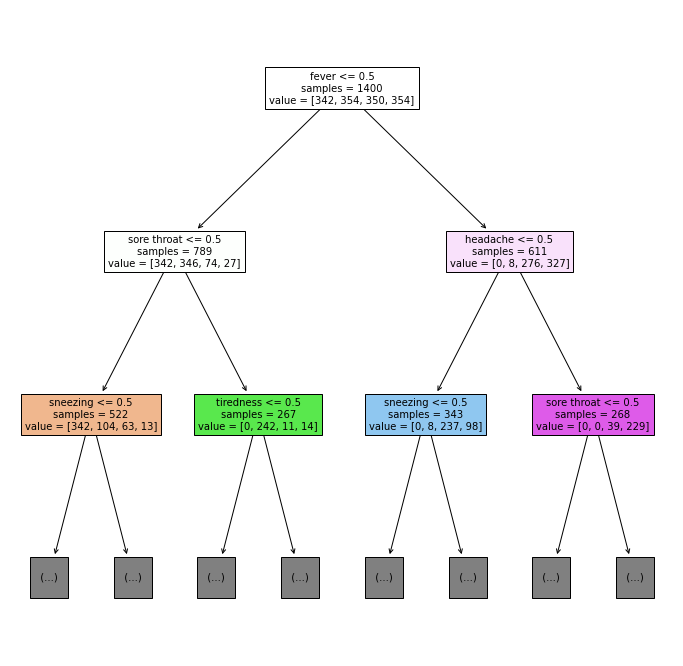

In [24]:

plt.figure(figsize=(12,12))  # set plot size (denoted in inches)

tree.plot_tree(model, 
               max_depth=2,
               filled=True, 
               impurity=False, 
               fontsize=10, 
               feature_names=train_symptoms.columns)

plt.savefig('tree.png',format='png',bbox_inches = "tight")
